In [1]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, precision_recall_curve 

Using TensorFlow backend.


In [2]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 7

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
diff1 = np.load('new_diff1.npy')
diff0 = np.load('new_diff0.npy')

CH11 = np.load('new_ch1_c.npy')
CH10 = np.load('new_ch0_c.npy')

diff1_t = np.load('new_diff1_t.npy')
diff0_t = np.load('new_diff0_t.npy')
CH11_t = np.load('new_ch1_t.npy')
CH10_t = np.load('new_ch0_t.npy')
combined1 = np.c_[diff1_t, CH11_t]
combined0 = np.c_[diff0_t, CH10_t]

In [4]:
len(diff1), len(diff0)

(4920322, 1924741)

In [5]:
len(CH11), len(CH10)

(5004258, 27496352)

In [6]:
len(combined1), len(combined0)

(4920323, 313811)

In [7]:

trues = np.array(len(diff1)*[1])
falses = np.array(len(diff0)*[0])

trues_c = np.array(len(CH11)*[1])
falses_c = np.array(len(CH10)*[0])

trues_t = np.array(len(combined1)*[1])
falses_t = np.array(len(combined0)*[0])

In [8]:
np.shape(combined1)

(4920323, 15)

In [9]:
train_number_signal = int(np.rint(len(diff1)*0.8))   
validation_number_signal = int(np.rint(len(diff1)*0.1))
#test_number_signal = len(diff1)-train_number_signal-validation_number_signal
test_number_signal = len(diff1)

train_number_background = int(np.rint(len(diff0)*0.8))
validation_number_background = int(np.rint(len(diff0)*0.1))
#test_number_background = len(diff0)-train_number_background-validation_number_background
test_number_background = len(diff0)

In [10]:
train_number_signal_c = int(np.rint(len(CH11)*0.8))   
validation_number_signal_c = int(np.rint(len(CH11)*0.1))
#test_number_signal_c = len(CH11)-train_number_signal_c-validation_number_signal_c
test_number_signal_c = len(CH11)

train_number_background_c = int(np.rint(len(CH10)*0.8))
validation_number_background_c = int(np.rint(len(CH10)*0.1))
#test_number_background_c = len(CH10)-train_number_background_c-validation_number_background_c
test_number_background_c = len(CH10)

In [11]:
train_number_signal_t = int(np.rint(len(combined1)*0.8))   
validation_number_signal_t = int(np.rint(len(combined1)*0.1))
#test_number_signal_t = len(combined1)-train_number_signal_t-validation_number_signal_t
test_number_signal_t = len(combined1)

train_number_background_t = int(np.rint(len(combined0)*0.8))
validation_number_background_t = int(np.rint(len(combined0)*0.1))
#test_number_background_t = len(combined0)-train_number_background_t-validation_number_background_t
test_number_background_t = len(combined0)

In [12]:
np.random.seed(0)
indices_1 = np.random.permutation(len(diff1))
indices_c1 = np.random.permutation(len(CH11))
indices_t1 = np.random.permutation(len(combined1))

train_c1 = CH11[indices_c1[:train_number_signal_c]]
#test_c1 = CH11[indices_c1[train_number_signal_c+validation_number_signal_c:]]
test_c1 = CH11[indices_c1[0:]]
validate_c1 = CH11[indices_c1[train_number_signal_c:train_number_signal_c+validation_number_signal_c]]

train_1 = diff1[indices_1[:train_number_signal]]
#test_1 = diff1[indices_1[train_number_signal+validation_number_signal:]]
test_1 = diff1[indices_1[0:]]
validate_1 = diff1[indices_1[train_number_signal:train_number_signal+validation_number_signal]]

train_t1 = combined1[indices_t1[:train_number_signal_t]]
#test_t1 = combined1[indices_t1[train_number_signal_t+validation_number_signal_t:]]
test_t1 = combined1[indices_t1[0:]]
validate_t1 = combined1[indices_t1[train_number_signal_t:train_number_signal_t+validation_number_signal_t]]

In [13]:
np.random.seed(1)
indices_0 = np.random.permutation(len(diff0))
indices_c0 = np.random.permutation(len(CH10))
indices_t0 = np.random.permutation(len(combined0))


train_c0 = CH10[indices_c0[:train_number_background_c]]
#test_c0 = CH10[indices_c0[train_number_background_c+validation_number_background_c:]]
test_c0 = CH10[indices_c0[0:]]
validate_c0 = CH10[indices_c0[train_number_background_c:train_number_background_c+validation_number_background_c]]

train_0 = diff0[indices_0[:train_number_background]]
#test_0 = diff0[indices_0[train_number_background+validation_number_background:]]
test_0 = diff0[indices_0[0:]]
validate_0 = diff0[indices_0[train_number_background:train_number_background+validation_number_background]]

train_t0 = combined0[indices_t0[:train_number_background_t]]
#test_t0 = combined0[indices_t0[train_number_background_t+validation_number_background_t:]]
test_t0 = combined0[indices_t0[0:]]
validate_t0 = combined0[indices_t0[train_number_background_t:train_number_background_t+validation_number_background_t]]

In [14]:
trues_train = trues[indices_1[:train_number_signal]]
#trues_test = trues[indices_1[train_number_signal+validation_number_signal:]]
trues_test = trues[indices_1[0:]]
trues_validate = trues[indices_1[train_number_signal:train_number_signal+validation_number_signal]]

falses_train = falses[indices_0[:train_number_background]]
#falses_test = falses[indices_0[train_number_background+validation_number_background:]]
falses_test = falses[indices_0[0:]]
falses_validate = falses[indices_0[train_number_background:train_number_background+validation_number_background]]


trues_train_c = trues_c[indices_c1[:train_number_signal_c]]
#trues_test_c = trues_c[indices_c1[train_number_signal_c+validation_number_signal_c:]]
trues_test_c = trues_c[indices_c1[0:]]
trues_validate_c = trues_c[indices_c1[train_number_signal_c:train_number_signal_c+validation_number_signal_c]]

falses_train_c = falses_c[indices_c0[:train_number_background_c]]
#falses_test_c = falses_c[indices_c0[train_number_background_c+validation_number_background_c:]]
falses_test_c = falses_c[indices_c0[0:]]
falses_validate_c = falses_c[indices_c0[train_number_background_c:train_number_background_c+validation_number_background_c]]


trues_train_t = trues_t[indices_t1[:train_number_signal_t]]
#trues_test_t = trues_t[indices_t1[train_number_signal_t+validation_number_signal_t:]]
trues_test_t = trues_t[indices_t1[0:]]
trues_validate_t = trues_t[indices_t1[train_number_signal_t:train_number_signal_t+validation_number_signal_t]]

falses_train_t = falses_t[indices_t0[:train_number_background_t]]
#falses_test_t = falses_t[indices_t0[train_number_background_t+validation_number_background_t:]]
falses_test_t = falses_t[indices_t0[0:]]
falses_validate_t = falses_t[indices_t0[train_number_background_t:train_number_background_t+validation_number_background_t]]

In [15]:
train = np.array(list(train_1) + list(train_0))
test = np.array(list(test_1) + list(test_0))
validate = np.array(list(validate_1) + list(validate_0))

train_c = np.array(list(train_c1) + list(train_c0))
test_c = np.array(list(test_c1) + list(test_c0))
validate_c = np.array(list(validate_c1) + list(validate_c0))

train_total = np.array(list(train_t1) + list(train_t0))
test_total = np.array(list(test_t1) + list(test_t0))
validate_total = np.array(list(validate_t1) + list(validate_t0))

indicator_train = np.array(list(trues_train) + list(falses_train))
indicator_test = np.array(list(trues_test) + list(falses_test))
indicator_validate = np.array(list(trues_validate) + list(falses_validate))

indicator_train_c = np.array(list(trues_train_c) + list(falses_train_c))
indicator_test_c = np.array(list(trues_test_c) + list(falses_test_c))
indicator_validate_c = np.array(list(trues_validate_c) + list(falses_validate_c))

indicator_train_t = np.array(list(trues_train_t) + list(falses_train_t))
indicator_test_t = np.array(list(trues_test_t) + list(falses_test_t))
indicator_validate_t = np.array(list(trues_validate_t) + list(falses_validate_t))

In [16]:
# create model
model_clasify = Sequential()
es = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=100)
model_clasify.add(Dense(128, input_dim=12, activation='relu'))
model_clasify.add(Dense(64, activation='relu'))
model_clasify.add(Dense(32, activation='relu'))
model_clasify.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr = 0.001)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model_clasify.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_clasify.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [19]:
a = model_clasify.fit(train, indicator_train, validation_data = (validate, indicator_validate), epochs=3000, callbacks = [es], batch_size=2000, class_weight={0: 1, 1: len(falses)/len(trues)})

Instructions for updating:
Use tf.cast instead.
Train on 5476051 samples, validate on 684506 samples
Epoch 1/3000
5476051/5476051 [==============================] - 31s 6us/step - loss: 0.0138 - acc: 0.9958 - val_loss: 0.0097 - val_acc: 0.9990
Epoch 2/3000
5476051/5476051 [==============================] - 31s 6us/step - loss: 0.0046 - acc: 0.9991 - val_loss: 0.0077 - val_acc: 0.9993
Epoch 3/3000
5476051/5476051 [==============================] - 30s 6us/step - loss: 0.0040 - acc: 0.9992 - val_loss: 0.0067 - val_acc: 0.9994
Epoch 4/3000
5476051/5476051 [==============================] - 26s 5us/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0069 - val_acc: 0.9993
Epoch 5/3000
5476051/5476051 [==============================] - 29s 5us/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0067 - val_acc: 0.9994
Epoch 6/3000
5476051/5476051 [==============================] - 31s 6us/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0064 - val_acc: 0.9995
Epoch 7/3000
5476051/5476051 [===========

Epoch 56/3000
5476051/5476051 [==============================] - 32s 6us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0051 - val_acc: 0.9995
Epoch 57/3000
5476051/5476051 [==============================] - 34s 6us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0073 - val_acc: 0.9988
Epoch 58/3000
5476051/5476051 [==============================] - 33s 6us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0051 - val_acc: 0.9995
Epoch 59/3000
5476051/5476051 [==============================] - 34s 6us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0050 - val_acc: 0.9995
Epoch 60/3000
5476051/5476051 [==============================] - 35s 6us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0050 - val_acc: 0.9996
Epoch 61/3000
5476051/5476051 [==============================] - 34s 6us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0051 - val_acc: 0.9995
Epoch 62/3000
5476051/5476051 [==============================] - 34s 6us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0053 - val_acc:

Epoch 113/3000
5476051/5476051 [==============================] - 42s 8us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0053 - val_acc: 0.9994
Epoch 114/3000
5476051/5476051 [==============================] - 42s 8us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0049 - val_acc: 0.9996
Epoch 115/3000
5476051/5476051 [==============================] - 42s 8us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0049 - val_acc: 0.9996
Epoch 116/3000
5476051/5476051 [==============================] - 43s 8us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0049 - val_acc: 0.9996
Epoch 117/3000
5476051/5476051 [==============================] - 42s 8us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0050 - val_acc: 0.9996
Epoch 118/3000
5476051/5476051 [==============================] - 42s 8us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0049 - val_acc: 0.9996


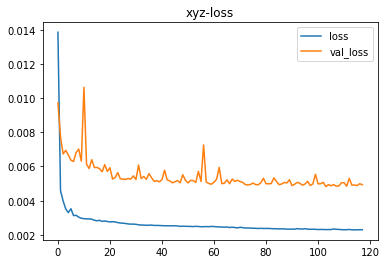

In [20]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('xyz-loss')
plt.legend(['loss', 'val_loss'])

In [21]:
predictions_clasify = model_clasify.predict(test)
predictions_clasify

array([[9.9994624e-01],
       [9.9994266e-01],
       [9.9998009e-01],
       ...,
       [0.0000000e+00],
       [4.2228221e-27],
       [0.0000000e+00]], dtype=float32)

In [22]:
len(predictions_clasify)

6845063

In [23]:
np.std(predictions_clasify)

0.44959643

In [24]:
indicator_test

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
fpr_clasify, tpr_clasify, _ = roc_curve(indicator_test, predictions_clasify)

Text(0, 0.5, 'true-positive-rate')

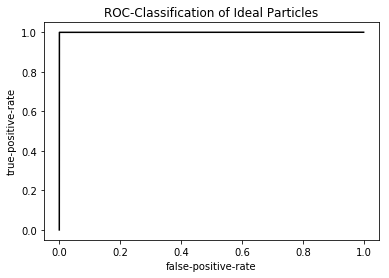

In [26]:
fig = plt.figure()
ax = plt.axes()
ax.plot(fpr_clasify, tpr_clasify, color='black')
plt.title('ROC-Classification of Ideal Particles')
plt.xlabel('false-positive-rate')
plt.ylabel('true-positive-rate')

In [27]:
train_c

array([[4., 4., 4.],
       [6., 6., 5.],
       [6., 7., 6.],
       ...,
       [2., 3., 5.],
       [3., 3., 1.],
       [2., 2., 2.]])

In [28]:
# create model
model_clasify_c = Sequential()
es = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=100)
model_clasify_c.add(Dense(128, input_dim=3, activation='relu'))
model_clasify_c.add(Dense(64, activation='relu'))
model_clasify_c.add(Dense(32, activation='relu'))
model_clasify_c.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr = 0.001)
model_clasify_c.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [29]:
b = model_clasify_c.fit(train_c, indicator_train_c, validation_data = (validate_c, indicator_validate_c), epochs=3000, callbacks = [es], class_weight={0: 1, 1: len(falses_c)/len(trues_c)}, batch_size=2000)

Train on 26000488 samples, validate on 3250061 samples
Epoch 1/3000
26000488/26000488 [==============================] - 179s 7us/step - loss: 0.6749 - acc: 0.7761 - val_loss: 0.4234 - val_acc: 0.7536
Epoch 2/3000
26000488/26000488 [==============================] - 195s 8us/step - loss: 0.6696 - acc: 0.7790 - val_loss: 0.4152 - val_acc: 0.7874
Epoch 3/3000
26000488/26000488 [==============================] - 173s 7us/step - loss: 0.6691 - acc: 0.7794 - val_loss: 0.4137 - val_acc: 0.7655
Epoch 4/3000
26000488/26000488 [==============================] - 163s 6us/step - loss: 0.6689 - acc: 0.7808 - val_loss: 0.4221 - val_acc: 0.7978
Epoch 5/3000
26000488/26000488 [==============================] - 159s 6us/step - loss: 0.6687 - acc: 0.7830 - val_loss: 0.4130 - val_acc: 0.7821
Epoch 6/3000
26000488/26000488 [==============================] - 158s 6us/step - loss: 0.6687 - acc: 0.7831 - val_loss: 0.4402 - val_acc: 0.7597
Epoch 7/3000
26000488/26000488 [==============================] - 159

26000488/26000488 [==============================] - 153s 6us/step - loss: 0.6684 - acc: 0.7868 - val_loss: 0.4231 - val_acc: 0.7716
Epoch 57/3000
26000488/26000488 [==============================] - 160s 6us/step - loss: 0.6684 - acc: 0.7863 - val_loss: 0.4199 - val_acc: 0.7716
Epoch 58/3000
26000488/26000488 [==============================] - 157s 6us/step - loss: 0.6683 - acc: 0.7870 - val_loss: 0.4148 - val_acc: 0.7978
Epoch 59/3000
26000488/26000488 [==============================] - 157s 6us/step - loss: 0.6683 - acc: 0.7857 - val_loss: 0.4177 - val_acc: 0.7978
Epoch 60/3000
26000488/26000488 [==============================] - 156s 6us/step - loss: 0.6683 - acc: 0.7871 - val_loss: 0.4146 - val_acc: 0.7821
Epoch 61/3000
26000488/26000488 [==============================] - 158s 6us/step - loss: 0.6683 - acc: 0.7852 - val_loss: 0.4198 - val_acc: 0.7873
Epoch 62/3000
26000488/26000488 [==============================] - 160s 6us/step - loss: 0.6683 - acc: 0.7869 - val_loss: 0.4189 - v

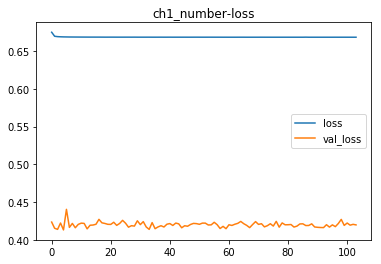

In [30]:
plt.plot(b.history['loss'])
plt.plot(b.history['val_loss'])
plt.title('ch1_number-loss')
plt.legend(['loss', 'val_loss'])

In [31]:
predictions_clasify_c = model_clasify_c.predict(test_c)
predictions_clasify_c

array([[9.1738486e-01],
       [9.1886842e-01],
       [9.6861434e-01],
       ...,
       [1.4774203e-03],
       [8.7334272e-05],
       [2.0158265e-04]], dtype=float32)

In [32]:
fpr_clasify_c, tpr_clasify_c, _ = roc_curve(indicator_test_c, predictions_clasify_c)

Text(0.5, 1.0, 'ROC-CURVE')

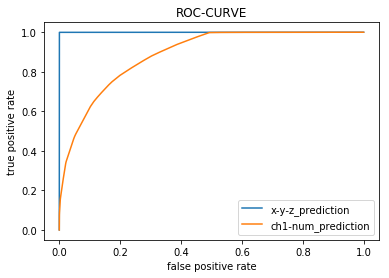

In [33]:
plt.plot(fpr_clasify, tpr_clasify)
plt.plot(fpr_clasify_c, tpr_clasify_c)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction'])
plt.title('ROC-CURVE')

In [34]:
a_ = []
for i in fpr_clasify:
    if i == 0:
        a_.append(test_number_background)
    else:
        a_.append(1.0/i)

In [35]:
b_ = []
for i in fpr_clasify_c:
    if i == 0:
        b_.append(test_number_background_c)
    else:
        b_.append(1.0/i)

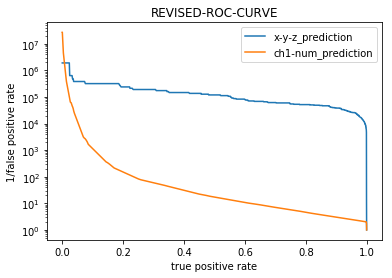

In [36]:
plt.plot(tpr_clasify, np.array(a_))
plt.plot(tpr_clasify_c, np.array(b_))
plt.xlabel('true positive rate')
plt.ylabel('1/false positive rate')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction'])
plt.title('REVISED-ROC-CURVE')
plt.yscale('log')

In [37]:
# create model
model_clasify_t = Sequential()
adam = optimizers.Adam(lr = 0.001)
es = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=100)
model_clasify_t.add(Dense(128, input_dim=15, activation='relu'))
model_clasify_t.add(Dense(64, activation='relu'))
model_clasify_t.add(Dense(32, activation='relu'))
model_clasify_t.add(Dense(1, activation='sigmoid'))
model_clasify_t.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [38]:
c = model_clasify_t.fit(train_total, indicator_train_t, validation_data = (validate_total, indicator_validate_t), epochs=3000, callbacks = [es], batch_size=2000, class_weight={0: 1, 1: len(falses_t)/len(trues_t)})

Train on 4187307 samples, validate on 523413 samples
Epoch 1/3000
4187307/4187307 [==============================] - 31s 8us/step - loss: 0.0055 - acc: 0.9958 - val_loss: 0.0122 - val_acc: 0.9988
Epoch 2/3000
4187307/4187307 [==============================] - 32s 8us/step - loss: 0.0017 - acc: 0.9987 - val_loss: 0.0101 - val_acc: 0.9992
Epoch 3/3000
4187307/4187307 [==============================] - 31s 7us/step - loss: 0.0012 - acc: 0.9991 - val_loss: 0.0120 - val_acc: 0.9991
Epoch 4/3000
4187307/4187307 [==============================] - 32s 8us/step - loss: 9.9659e-04 - acc: 0.9993 - val_loss: 0.0083 - val_acc: 0.9994
Epoch 5/3000
4187307/4187307 [==============================] - 31s 7us/step - loss: 9.1873e-04 - acc: 0.9993 - val_loss: 0.0085 - val_acc: 0.9994
Epoch 6/3000
4187307/4187307 [==============================] - 32s 8us/step - loss: 8.6935e-04 - acc: 0.9993 - val_loss: 0.0089 - val_acc: 0.9993
Epoch 7/3000
4187307/4187307 [==============================] - 32s 8us/step 

4187307/4187307 [==============================] - 26s 6us/step - loss: 4.5390e-04 - acc: 0.9994 - val_loss: 0.0048 - val_acc: 0.9995
Epoch 57/3000
4187307/4187307 [==============================] - 25s 6us/step - loss: 4.5860e-04 - acc: 0.9994 - val_loss: 0.0049 - val_acc: 0.9995
Epoch 58/3000
4187307/4187307 [==============================] - 25s 6us/step - loss: 4.5648e-04 - acc: 0.9994 - val_loss: 0.0046 - val_acc: 0.9995
Epoch 59/3000
4187307/4187307 [==============================] - 27s 6us/step - loss: 4.5670e-04 - acc: 0.9994 - val_loss: 0.0051 - val_acc: 0.9994
Epoch 60/3000
4187307/4187307 [==============================] - 26s 6us/step - loss: 4.5789e-04 - acc: 0.9994 - val_loss: 0.0047 - val_acc: 0.9995
Epoch 61/3000
4187307/4187307 [==============================] - 26s 6us/step - loss: 4.4706e-04 - acc: 0.9994 - val_loss: 0.0051 - val_acc: 0.9995
Epoch 62/3000
4187307/4187307 [==============================] - 27s 6us/step - loss: 4.5021e-04 - acc: 0.9994 - val_loss: 0.0

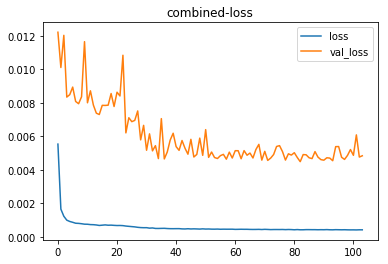

In [39]:
plt.plot(c.history['loss'])
plt.plot(c.history['val_loss'])
plt.title('combined-loss')
plt.legend(['loss', 'val_loss'])

In [40]:
predictions_clasify_t = model_clasify_t.predict(test_total)
predictions_clasify_t

array([[9.9993908e-01],
       [9.9966037e-01],
       [9.9999666e-01],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [4.4504483e-13]], dtype=float32)

In [ ]:
model_clasify_t.predict(test_total[-1].reshape((1, 15)))

array([[4.4504824e-13]], dtype=float32)

In [ ]:
fpr_clasify_t, tpr_clasify_t, _ = roc_curve(indicator_test_t, predictions_clasify_t)

Text(0.5, 1.0, 'ROC-CURVE')

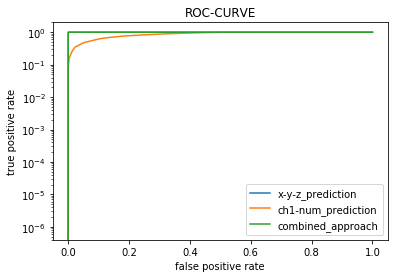

In [ ]:
plt.plot(fpr_clasify, tpr_clasify)
plt.plot(fpr_clasify_c, tpr_clasify_c)
plt.plot(fpr_clasify_t, tpr_clasify_t)
plt.yscale('log')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction', 'combined_approach'])
plt.title('ROC-CURVE')

In [ ]:
c_ = []
for i in fpr_clasify_t:
    if i == 0:
        c_.append(test_number_background_t)
    else:
        c_.append(1.0/i)

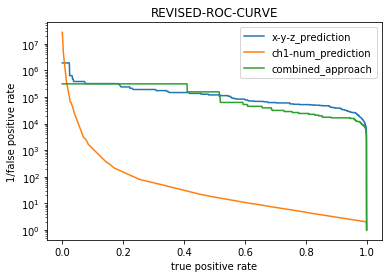

In [ ]:
plt.plot(tpr_clasify, np.array(a_))
plt.plot(tpr_clasify_c, np.array(b_))
plt.plot(tpr_clasify_t, np.array(c_))
plt.xlabel('true positive rate')
plt.ylabel('1/false positive rate')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction', 'combined_approach'])
plt.title('REVISED-ROC-CURVE')
plt.yscale('log')

In [ ]:
f1 = pd.read_pickle('ideal_final_data_cut.pkl')
f2 = pd.read_pickle('ideal_final_data2_cut.pkl')
f3 = pd.read_pickle('ideal_final_data3_cut.pkl')
f4 = pd.read_pickle('ideal_final_data4_cut.pkl')
f5 = pd.read_pickle('ideal_final_data5_cut.pkl')
f6 = pd.read_pickle('ideal_final_data6_cut.pkl')
f7 = pd.read_pickle('ideal_final_data7_cut.pkl')
f8 = pd.read_pickle('ideal_final_data8_cut.pkl')
f9 = pd.read_pickle('ideal_final_data9_cut.pkl')
f10 = pd.read_pickle('ideal_final_data10_cut.pkl')
f11 = pd.read_pickle('ideal_final_data11_cut.pkl')
f12 = pd.read_pickle('ideal_final_data12_cut.pkl')
f13 = pd.read_pickle('ideal_final_data13_cut.pkl')
f14 = pd.read_pickle('ideal_final_data14_cut.pkl')
f15 = pd.read_pickle('ideal_final_data15_cut.pkl')
f161 = pd.read_pickle('ideal_final_data161_cut.pkl')
f162 = pd.read_pickle('ideal_final_data162_cut.pkl')

f17 = pd.read_pickle('ideal_final_data17_cut.pkl')
f18 = pd.read_pickle('ideal_final_data18_cut.pkl')
f19 = pd.read_pickle('ideal_final_data19_cut.pkl')
f20 = pd.read_pickle('ideal_final_data20_cut.pkl')
f21 = pd.read_pickle('ideal_final_data21_cut.pkl')
f22 = pd.read_pickle('ideal_final_data22_cut.pkl')
f23 = pd.read_pickle('ideal_final_data23_cut.pkl')
f24 = pd.read_pickle('ideal_final_data24_cut.pkl')
f25 = pd.read_pickle('ideal_final_data25_cut.pkl')
f26 = pd.read_pickle('ideal_final_data26_cut.pkl')
f27 = pd.read_pickle('ideal_final_data27_cut.pkl')
f = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f161, f162, f17, f18, f19, f20, f21, f22, f23, f24, f25, f26, f27])
f

,event_id,hit_id,eta,layer_id,module_id,nch0,nch1,particle_id,tpx,tpy,tpz,volume_id,x,y,z
20042,1000,20043.0,-0.372461,2.0,97.0,3.0,2.0,1.080958e+17,-2.771100,-0.023715,-1.515780,8.0,-33.674000,-0.446628,-12.835400
21826,1000,21827.0,-0.364603,2.0,112.0,1.0,2.0,1.080958e+17,-2.771340,-0.024289,-1.515410,8.0,-32.010101,-0.440721,-11.932400
29668,1000,29669.0,-0.455122,4.0,193.0,3.0,2.0,1.080958e+17,-2.770970,0.000340,-1.514780,8.0,-73.471901,-0.615863,-34.606300
30703,1000,30704.0,-0.453312,4.0,224.0,1.0,3.0,1.080958e+17,-2.770980,-0.001129,-1.515090,8.0,-71.580399,-0.604620,-33.572201
37345,1000,37346.0,-0.480718,6.0,313.0,2.0,2.0,1.080958e+17,-2.768900,0.027852,-1.513700,8.0,-117.384003,-0.393283,-58.627499
38162,1000,38163.0,-0.479987,6.0,364.0,2.0,2.0,1.080958e+17,-2.768750,0.026067,-1.514100,8.0,-115.445999,-0.404245,-57.565300
43651,1000,43652.0,-0.494011,8.0,391.0,2.0,2.0,1.080958e+17,-2.768500,0.058717,-1.512330,8.0,-172.957001,0.472070,-88.960899
44183,1000,44184.0,-0.493657,8.0,468.0,2.0,3.0,1.080958e+17,-2.768770,0.057969,-1.511960,8.0,-170.962006,0.427640,-87.866699
20043,1000,20044.0,-1.095952,2.0,97.0,2.0,5.0,5.944780e+17,-0.319480,0.002672,-0.442060,8.0,-34.331402,1.433860,-45.662899
21914,1000,21915.0,-1.093295,2.0,112.0,1.0,5.0,5.944780e+17,-0.319730,0.004456,-0.442086,8.0,-31.905899,1.406340,-42.300098


In [ ]:
ha = 60000000/33652695375
number_of_events = len(f['event_id'].unique())
#per event based purity. TPR & FPR will not change either per event or not, if not per event based, excluding ha and number_of_events terms in the last part of its calculation.
def purity_evaluation(tpr, fpr):
    purity = []
    for i in range(len(tpr)):
        if tpr[i] == 0:
            purity.append(0)
        else:
            purity.append(1/(1+fpr[i]/tpr[i]*(len(falses_test)/ha)/(len(trues_test)/number_of_events)))
    return np.array(purity)

def purity_evaluation_c(tpr, fpr):
    purity = []
    for i in range(len(tpr)):
        if tpr[i] == 0:
            purity.append(0)
        else:
            purity.append(1/(1+fpr[i]/tpr[i]*(len(falses_test_c)/ha)/(len(trues_test_c)/number_of_events)))
    return np.array(purity)

def purity_evaluation_t(tpr, fpr):
    purity = []
    for i in range(len(tpr)):
        if tpr[i] == 0:
            purity.append(0)
        else:
            purity.append(1/(1+fpr[i]/tpr[i]*(len(falses_test_t)/ha)/(len(trues_test_t)/number_of_events)))
    return np.array(purity)

In [ ]:
number_of_events

1650

In [ ]:
haha = np.array([1/ha] * len(falses_test))
hehe = np.array([1/number_of_events] * len(trues_test))
weights = np.array(list(hehe) + list(haha))
weights

array([6.06060606e-04, 6.06060606e-04, 6.06060606e-04, ...,
       5.60878256e+02, 5.60878256e+02, 5.60878256e+02])

In [ ]:
haha_c = np.array([1/ha] * len(falses_test_c))
hehe_c = np.array([1/number_of_events] * len(trues_test_c))
weights_c = np.array(list(hehe_c) + list(haha_c))

haha_t = np.array([1/ha] * len(falses_test_t))
hehe_t = np.array([1/number_of_events] * len(trues_test_t))
weights_t = np.array(list(hehe_t) + list(haha_t))

In [ ]:
pure_clasify = purity_evaluation(tpr_clasify, fpr_clasify)
pure_clasify_c = purity_evaluation_c(tpr_clasify_c, fpr_clasify_c)
pure_clasify_t = purity_evaluation_t(tpr_clasify_t, fpr_clasify_t)

Text(0.5, 1.0, 'Efficiency vs Purity')

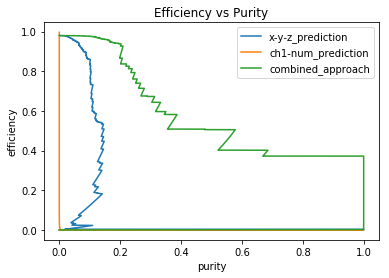

In [ ]:
plt.plot(pure_clasify, tpr_clasify*0.9799997530243563)
plt.plot(pure_clasify_c, tpr_clasify_c*0.9967176140240738)
plt.plot(pure_clasify_t, tpr_clasify_t*0.9799999521982625)

plt.ylabel('efficiency')
plt.xlabel('purity')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction', 'combined_approach'])
plt.title('Efficiency vs Purity')

In [ ]:
pur, eff, thr = precision_recall_curve(indicator_test, predictions_clasify, sample_weight = weights)
pur_c, eff_c, thr_c = precision_recall_curve(indicator_test_c, predictions_clasify_c, sample_weight = weights_c)
pur_t, eff_t, thr_t = precision_recall_curve(indicator_test_t, predictions_clasify_t, sample_weight = weights_t)

Text(0.5, 1.0, 'Efficiency vs Purity _sklearn')

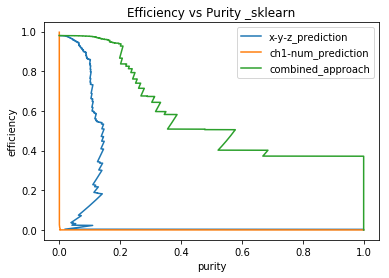

In [ ]:
plt.plot(pur, eff*0.9799997530243563)
plt.plot(pur_c, eff_c*0.9967176140240738)
plt.plot(pur_t, eff_t*0.9799999521982625)
plt.ylabel('efficiency')
plt.xlabel('purity')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction', 'combined_approach'])
plt.title('Efficiency vs Purity _sklearn')

In [ ]:
#this is done for 95% efficiency cut from doublet NN
model_clasify.save('fff_model_clasify_cut-11-98_1.h5')
model_clasify_c.save('fff_model_clasify_c_cut-11-98_1.h5')
model_clasify_t.save('fff_model_clasify_t_cut-11-98_1.h5')

In [ ]:
model_clasify = load_model('fff_model_clasify_cut-11-98_1.h5')
model_clasify_c = load_model('fff_model_clasify_c_cut-11-98_1.h5')
model_clasify_t = load_model('fff_model_clasify_t_cut-11-98_1.h5')